<a href="https://colab.research.google.com/github/ia-nechaev/aqm2022/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

When the value of an event is determined by chance, it has an uncertain outcome, this is called ##a random variable##.

Random variables are at the core of probability. There are two kinds of random variables, discrete and continous. 

For example, when I bike to campus, the outcome (i.e., my arrival time) depends on two random values: the amount of wind and red lights.  

Red lights are something we count, a discrete random value. Wind is something we measure, it is a continous random variable.

Random variables can be characterized by,

1.   Central tendency
2.   Variability (or spread)
3. Probability distribution(s)

Today, we will try to familiarize ourselves with central tendency and variability.

Next, we will build on this, and work on probability distributions.





#Example: Airbnb - stays

Many people travel and stay in Airbnb rentals. But how many nights do we on average stay in an Airbnb Rental. 

Moreover, while students have a long summer break, do they use this time to travel and stay in Airbnbs? Faculty has less time off, but often travel with the job to conferences and events. 

Now we might some guesses about whether students or faculty stay longer in airbnbs, but we do not have any real answers to these questions. 

Statistics, however, can help. Here, we use a test dataset. But if we collect a real sample, the same principles apply.

## 1. Key terms

We want to get a grasp on the key terms. In our efforts to set up a successful Airbnb rental, we start to think like scientists. 

We want to know the average (mean) price charged for rentals in Copenhagen. We randomly survey rental prices of 100 rental units in Copenhagen. Three of the rentals charge 566kr, 838kr, and 1056kr, respectively.

Please identify:


1.  population
2.  sample
3.  variable
4.  parameter
5.  statistic
6.  data 

##Dataset 1: Length of airbnb stays 
Reported by a sample of 55 students. 

The dataset includes the numbers of night stayed in Airbnb and frequency of students having stayed the number of nights.

In [ ]:
# Load packages used today
import numpy as np #Package for numerical multidimensional tables
import pandas as pd #Package for data frames
import seaborn as sns
import matplotlib.pyplot as plt #Package for plots and graphs

sns.set()

In [ ]:

# import data
from google.colab import files
uploaded = files.upload()



Saving Airbnb_Student.csv to Airbnb_Student.csv


In [ ]:
#Read data
df_s = pd.read_csv('Airbnb_Student.csv')

df_s 




FileNotFoundError: ignored

###Determining the location, centrality and spread of the data


Now lets try to play a little around with this data. Together we will calculate some descriptive statistics.

###Percentages
For example, 16 students out of 55 stayed 1 night or less, then f = 16, n = 55 and the relative frequency = f/n = 0.29 or 29% of students. 

### Cumulative frequencies
Lets calculate the cumulative frequencies and append them to the dataframe.


In [ ]:
#cumulative frequencies

# Declare a list that is to be converted into a column
C_freq = pd.Series(['5', '16', '28', '39', '47', '52', '55'], index=[0, 1, 2, 3, 4, 5, 6 ])

# Using 'Cumulative_frequency' as the column name
# and equating it to the list
df_s['C_frequency'] = C_freq

df_s


,Nights,Frequency,C_frequency
0,0,5,5
1,1,11,16
2,2,12,28
3,3,11,39
4,5,8,47
5,7,5,52
6,8,3,55


###Median
Let's calculate the median. In general, if there are n results, then the second quartile, the median = (n + 1)/2 

Median = 55+1/2 = 28th result. 

The 28th result is 2.

###1st quartile

To calculate the first and third quartile, we use the same approach, however, instead of half, we now want quarters, so we do:

Q1 = (n + 1)/4

Q1 = 55+1/4 = 14th result.

The 14th result is 1.

###3rd quartile

Q3 = 3(n + 1)/4

Q3 = 3(56)/4 = 42th result.

The 42th result is 5.

###Interquartile range

IQR = Q3 - Q1

IQR = 5-1 = 4

This means that half of the data is arranged 4 nights away from the median.

### Outliers

A value is a potential outlier if it is less than (1.5)IQR below Q1 or above Q3. In our case, no one stayed more than 11 nights (1.5x4 +5), so no potential outlier were detected.

###Mean
To calculate the mean, we add the numbers together and divide the total by the amount of numbers. Mean (μ) = Σfx / Σf (Σ = sum of)

Mean = (0x5 + 1x11 + 2x12 + 3x11 + 5x8 + 7x5 + 8x3) / (5 + 11 + 12 + 11 + 8 + 5 + 3)

Mean = (0 + 11 + 24 + 33 + 40 + 35 + 24) / 55

Mean = 84 / 55

Mean = 3.04

### Mode
The mode is the number which occurs most often in a set of data, so in our case, the mode is 2.

### Standard deviation
To calculate the standard deviation, we start by calculating the variance. 

Variance = ∑frequency⋅Nights^2−n(μ)^2/n−1

We add the sum of frequency⋅nights raised to the 2nd.

0^2 + 11^2 + 24^2 + 33^2 + 40^2 + 35^2 + 24^2 = 5187

Then we put the values into the equestion to find:

Variance = 5187−55(3.04)^2/55−1 = 86.64

Standard Deviation is the square root of the variance = 9.31


##Dataset 2: Length of airbnb stays 
Reported by a sample of 55 faculty. The dataset includes the numbers of night stayed in Airbnb and frequency of faculty having stayed the number of nights.

In [ ]:
#Read dataset
from google.colab import files
uploaded = files.upload()

Saving Airbnb_Faculty_outlier.csv to Airbnb_Faculty_outlier (4).csv


In [ ]:
#Show dataset
df_f = pd.read_csv('Airbnb_Faculty_outlier.csv', delimiter=';')
df_f




,Nights,Frequency
0,0,1
1,1,2
2,2,2
3,3,4
4,5,9
5,7,11
6,8,8
7,13,7
8,18,3
9,23,2


As mentioned in the lecture, we compute some measurements of the data that allow us to make better decisions. For example, computing a *representative* number for students' airbnb stay, but when we want to compare this against the analogous *representative* number for faculty. How would we do this?

We use the same measures as we just used. This allows us to tests between samples to compare their *central tendencies*. That is, how an airbnb stay in *the middle* of lengths of stays compares between the two groups. 

But in order to do so, you have to do a bit of work.

###Determining the location, centrality and spread of the data 

###Your turn...

###Cumulative frequencies
###Median
###1st Quartile
###3rd Quantile
###Interquartile range
###Outliers
###Mean
###Mode
###Standard Deviation

Despite showing the nightly stays reported by 55 students and 55 faculty, the statistics look quite different.

Where do you see the main differences? What do you think they mean? Anything you need to consider?

## Dataset 2: Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


NameError: ignored

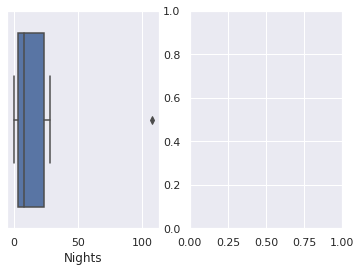

In [ ]:
# Box Plot
import seaborn as sns
f, axes = plt.subplots(1, 2)

sns.boxplot(df_f['Nights'], orient='v' , ax=axes[0])
sns.boxplot(df_s['Nights'], orient='v' , ax=axes[1])

In [ ]:
# 
# IQR for frequency distribution?
#Q1 = np.percentile(df_f['variable'], 25,
 #                  interpolation = 'midpoint')
 
#Q3 = np.percentile(df_f['variable'], 75,
 #                  interpolation = 'midpoint')
#IQR = Q3 - Q1


#removing outlier 

# Above Upper bound
#upper = df_f['Nights'] >= (Q3+1.5*IQR)
upper = df_f['Nights'] >= (5+1.5*4)

print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
#lower = df_f['Nights'] <= (Q1-1.5*IQR)
lower = df_f['Nights'] <= (1-1.5*4)

print("Lower bound:", lower)
print(np.where(lower))

#Removing the Outliers
df_f.drop(upper[0], inplace = True)
df_f.drop(lower[0], inplace = True)
 
print("New Shape: ", df_f.shape)


Upper bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12     True
Name: Nights, dtype: bool
(array([ 7,  8,  9, 10, 11, 12]),)
Lower bound: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: Nights, dtype: bool
(array([], dtype=int64),)


KeyError: ignored

In [ ]:
# calculating descriptive stats using python on dataset 1 and dataset 2 (without outlier)
# compare means?